In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
#colab용
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#colab용
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Dacon/천체관측/')

# RF_tune
* 제출결과 : not yet

In [0]:
path = "./data/"
train_df = pd.read_csv(path+'train.csv',index_col=0)
test_df = pd.read_csv(path+'test.csv',index_col=0)
sample_submission_df = pd.read_csv(path+'sample_submission.csv',index_col=0)
pd.options.display.max_columns = 30

In [0]:
column_number = {}
number_columns = {}
for i, column in enumerate(sample_submission_df.columns):
    column_number[column] = i
    number_columns[i] = column
    
    
def to_number(x, dic):
    return dic[x]

train_df['type_num'] = train_df['type'].apply(lambda x: to_number(x, column_number))


In [0]:
train_X = train_df.drop(columns=['type', 'type_num'], axis=1)
train_y = train_df['type_num']
test_X = test_df

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.3, random_state=42,stratify = train_y)

In [25]:
forest = RandomForestClassifier(n_estimators=1000, max_features = 10,max_depth = 4,random_state = 42,  n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
train_y_pred = forest.predict(X_test)

In [27]:
forest.score(X_test, y_test)

0.7498583286109537

### feature_importance

In [28]:
pi_df = pd.DataFrame(forest.feature_importances_, index= train_X.columns,columns= ['importance']).sort_values('importance',ascending = False)
pi_df.head()

,importance
modelMag_z,0.155563
psfMag_u,0.141208
petroMag_z,0.089936
modelMag_r,0.071992
fiberMag_u,0.068802


### 예측결과에 대해
잘된예측 : 1,3,4,5,6,8,9,10,14,15,16,18  
중간예측 : 0,2,7,13  
망한예측 : 11,12,17

In [29]:
pd.Series(train_y_pred).value_counts()

8     15571
6     13378
18     8118
4      6519
15     5609
10     4070
1      2442
5      2259
13     1151
3       881
dtype: int64

In [0]:
cm_result = pd.DataFrame(confusion_matrix(y_test,train_y_pred))

In [31]:
cm_result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,3,0,0,47,77,41,0,237,0,0,0,0,0,0,31,0,0,212
1,0,1790,0,0,30,5,69,0,26,0,0,0,0,0,0,5,0,0,27
2,0,4,0,136,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0
3,0,0,0,604,0,0,0,0,0,0,163,0,0,1,0,1,0,0,0
4,0,0,0,0,4185,10,104,0,0,0,0,0,0,0,0,87,0,0,0
5,0,0,0,0,1154,1449,72,0,471,0,0,0,0,0,0,812,0,0,92
6,0,110,0,1,118,7,10767,0,48,0,35,0,0,36,0,80,0,0,2
7,0,0,0,0,59,92,1,0,419,0,0,0,0,0,0,64,0,0,761
8,0,44,0,8,609,394,493,0,12104,0,55,0,0,103,0,88,0,0,1006
9,0,0,0,0,0,0,0,0,38,0,0,0,0,0,0,0,0,0,0


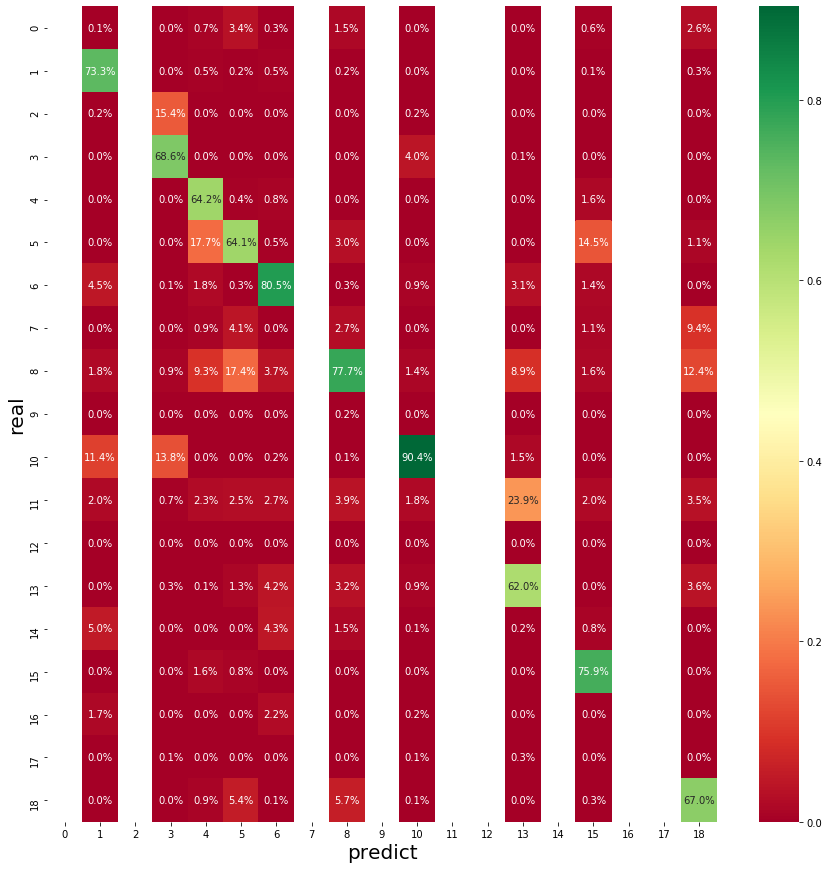

In [32]:
plt.figure(figsize =(15,15))
sns.heatmap(cm_result/np.sum(cm_result),annot = True, cmap ='RdYlGn',fmt='.1%')
plt.ylabel("real",fontsize=20)
plt.xlabel("predict",fontsize=20)
plt.show()

# REAL

In [33]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred = forest.predict_proba(test_X)

In [0]:
submission = pd.DataFrame(data=y_pred, columns=sample_submission_df.columns, index=sample_submission_df.index)
submission.to_csv('submission.csv', index=True)